## Activity inside ROI

Calculates the ROI for an embryo, using the structural channel to calculate the mask.

This code relies on the naming convention in this codebase to work properly: each embryo should have a file ending in `ch1.tif` (active channel) and another one ending in `ch2.tif` (structural channel).

To speed up the analysis, the ROI can be cached with the function `roi.cache_rois`, and passed to `activity.plot_activity` through the argument `mask_path`.

In [1]:
%load_ext autoreload
%autoreload 2
import os

from tifffile import imread

from pasnascope import roi, activity

In [2]:
base_dir = "/home/cdp58/Documents/repos/pasnascope_analysis/data/embryos/"

# All structural channel movies end with the suffix ch2
active = [f for f in sorted(os.listdir(base_dir)) if f.endswith('ch1.tif')]
struct = [f for f in sorted(os.listdir(base_dir)) if f.endswith('ch2.tif')]

emb63-ch1.tif


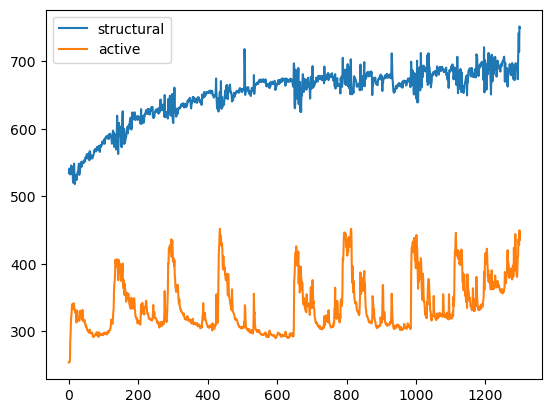

In [14]:
i =8
print(active[i])
active_img = imread(base_dir+active[i])
struct_img = imread(base_dir+struct[i])

mask = roi.get_roi(struct_img)
activity.plot_activity(active_img, struct_img, mask)

To plot the same graph, but with cached values, use the following code:

Saved ROIs in `/home/cdp58/Documents/repos/pasnascope_analysis/results/cache/roi/emb22.npy`.


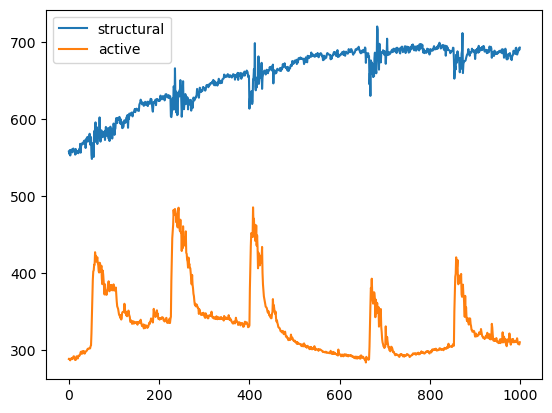

In [4]:
i = 3
active_img = imread(base_dir+active[i])
struct_img = imread(base_dir+struct[i])

filename = active[i][:-8] + '.npy'
full_path = os.path.join(os.path.dirname(os.getcwd()), 'results', 'cache', 'roi', filename)

if not os.path.isfile(full_path):
    roi.cache_rois(struct_img, file_path=full_path)

# mask = roi.get_roi(struct_img)
activity.plot_activity(active_img, struct_img, mask=None, mask_path=full_path, plot_diff=False)